In [51]:
!pip install kneed


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [2]:
df=pd.read_excel(r'C:\Users\LENOVO\Desktop\Two Area System Data Generation\data_set.xlsx')
df_new= df[['disturb_lvl', 'disturb_signal', 'f_coi']]

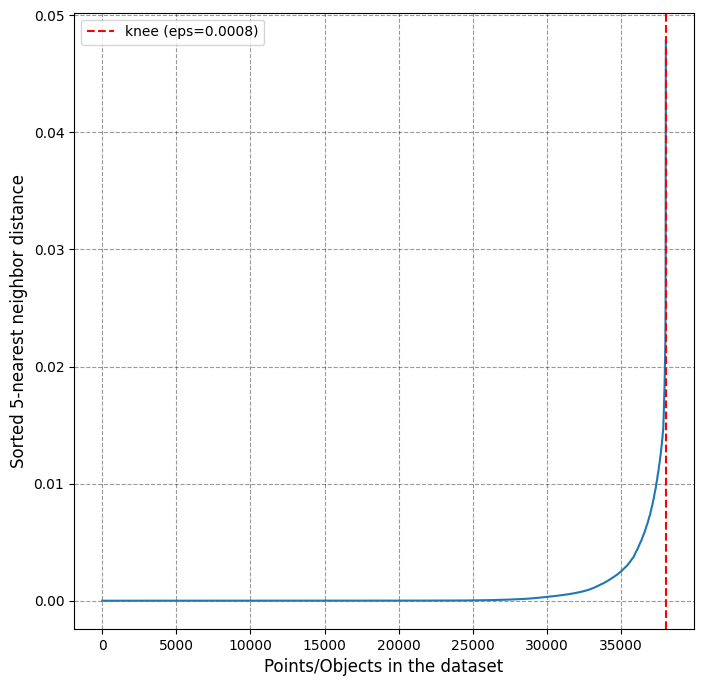

0.0008240084844999274

In [50]:
# def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):
#     # nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)
#     nbrs = NearestNeighbors(n_neighbors=k).fit(X)
#     distances, _ = nbrs.kneighbors(X)
    
#     # k_distances = np.sort(distances[:, -1])
#     k_distances = np.mean(distances, axis=1)
#     k_distances_sorted = np.sort(k_distances, axis=0)
#     plt.plot(k_distances_sorted)
#     # distances = np.sort(distances, axis=0)
#     # distances = distances[:, k-1]
#     # plt.figure(figsize=(8,8))
#     # plt.plot(distances)
#     # plt.xlabel('Points/Objects in the dataset', fontsize=12)
#     # plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
#     # plt.grid(True, linestyle="--", color='black', alpha=0.4)

#     #  # Find the "knee" point in the plot
#     # laplacian = np.gradient(np.gradient(distances))
#     # knee = np.argmin(laplacian)
#     # eps = distances[32500]

#     # # Highlight the "knee" point on the plot
#     # plt.axvline(x=knee, color='r', linestyle='--', label=f'knee (eps={eps:.4f})')
#     # plt.legend()
    
#     # plt.show()
#     # plt.close()

#     # return eps

# # Assuming 'X' is your dataset
# X=df_new.values
# k = 2 * X.shape[1] - 1 # k=2*{dim(dataset)} - 1
# # get_kdist_plot(X=X, k=k)
# calc_eps=get_kdist_plot(X=X, k=k)
# calc_eps

38016


0.02143644963284146

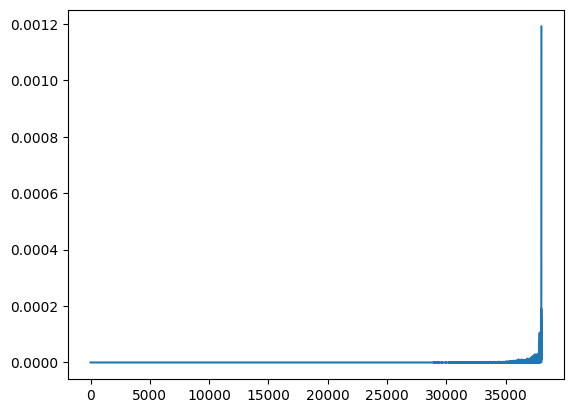

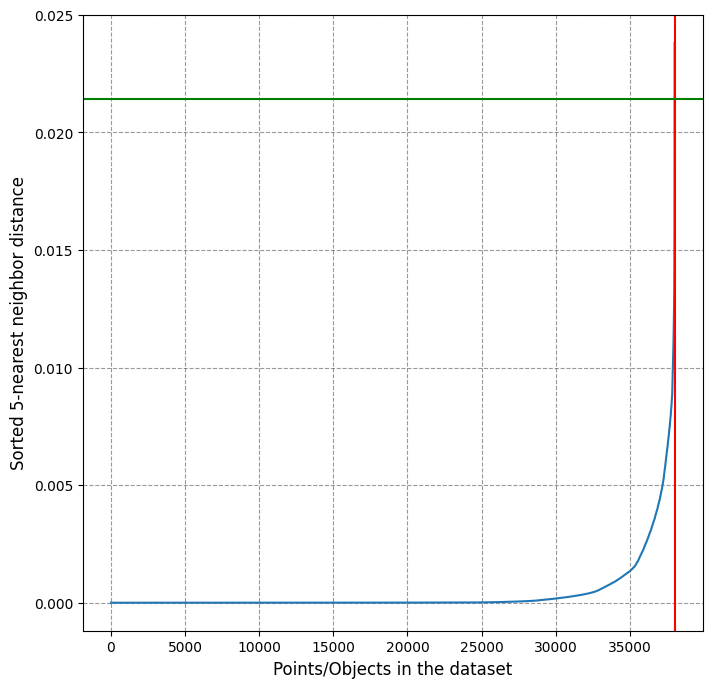

In [28]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):
    # nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)
    distances, _ = nbrs.kneighbors(X)
    
    # k_distances = np.sort(distances[:, -1])
    k_distances = np.mean(distances, axis=1)
    k_distances_sorted = np.sort(k_distances, axis=0)
    derivative = np.diff(k_distances_sorted)
    # print(derivative)
    plt.plot(derivative)
    knee_idx = np.argmax(derivative)
    print(knee_idx)
    eps = k_distances_sorted[knee_idx]
    
    plt.figure(figsize=(8,8))
    plt.plot(k_distances_sorted)
    plt.axvline(knee_idx, color='red', label='Auto-detected elbow')
    plt.axhline(eps, color='green', label='Auto-detected elbow')
    # plt.axvline(32500, color='red', label='Auto-detected elbow')
    # plt.axhline(k_distances_sorted[32500], color='green', label='Auto-detected elbow')
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)

    return eps
    
    # distances = np.sort(distances, axis=0)
    # distances = distances[:, k-1]
    # plt.figure(figsize=(8,8))
    # plt.plot(distances)
    # plt.xlabel('Points/Objects in the dataset', fontsize=12)
    # plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    # plt.grid(True, linestyle="--", color='black', alpha=0.4)

    #  # Find the "knee" point in the plot
    # laplacian = np.gradient(np.gradient(distances))
    # knee = np.argmin(laplacian)
    # eps = distances[32500]

    # # Highlight the "knee" point on the plot
    # plt.axvline(x=knee, color='r', linestyle='--', label=f'knee (eps={eps:.4f})')
    # plt.legend()
    
    # plt.show()
    # plt.close()

    # return eps

# Assuming 'X' is your dataset
X=df_new.values
k = 2 * X.shape[1] - 1 # k=2*{dim(dataset)} - 1
# get_kdist_plot(X=X, k=k)
calc_eps=get_kdist_plot(X=X, k=k)
calc_eps

0.021718147809295374

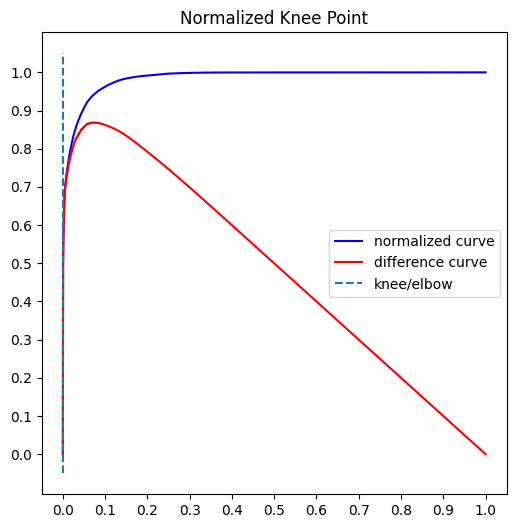

In [86]:
# def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):
#     nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)
#     distances, indices = nbrs.kneighbors(X) 
#     distances = np.sort(distances, axis=0)
#     distances = distances[:, k-1]
#     # differences = distances[1:] - distances[:-1]
#     # plt.plot(differences)
#     # grad=np.gradient(differences)
#     # max_diff=np.modmax(grad)
#     kneedle = KneeLocator(range(1,len(distances)+1), distances, curve="convex", direction="increasing")
#     kneedle.plot_knee_normalized()
#     max_diff = np.max(kneedle.knee_y)
#     return max_diff
#     # fig=px.line(x=list(range(1,len(distances)+1)),y= distances)
#     # fig.show()

# # Assuming 'X' is your dataset
# X=df_new.values
# # k=2*{dim(dataset)} - 1
# k = 2 * X.shape[1] - 1
# eps=get_kdist_plot(X=X, k=k)
# eps

In [6]:

# Assuming 'df' is your DataFrame containing the dataset
n_signals, n_samples, features=19, 2001, 3

calc_eps = 0.0000333233  # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 2*features  # The number of samples in a neighborhood for a point to be considered as a core point

dbscan = DBSCAN(eps=calc_eps, min_samples=min_samples)

# Fit the model to the data
# dbscan.fit(df_new.values)
dbscan.fit(df_new)

# Get the labels assigned to each data point (including outliers)
labels = dbscan.labels_

# Find the indices of anomalies (points labeled as -1)
anomaly_indices = np.where(labels == -1)[0]

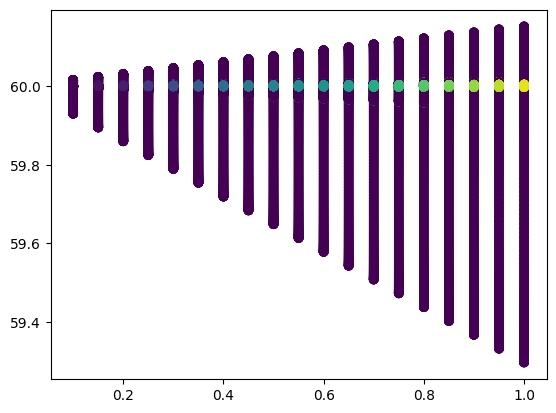

In [16]:
plt.scatter(df_new["disturb_lvl"], df_new["f_coi"],c=labels)

In [11]:
df_new.shape
df_3d=df_new.values.reshape(n_signals, n_samples, features)
df_3d

array([[[ 0.1       ,  0.        , 59.999994  ],
        [ 0.1       ,  0.        , 59.999994  ],
        [ 0.1       ,  0.        , 59.999994  ],
        ...,
        [ 0.1       ,  0.        , 59.9999549 ],
        [ 0.1       ,  0.        , 59.99995471],
        [ 0.1       ,  0.        , 59.99995453]],

       [[ 0.15      ,  0.        , 59.999994  ],
        [ 0.15      ,  0.        , 59.999994  ],
        [ 0.15      ,  0.        , 59.999994  ],
        ...,
        [ 0.15      ,  0.        , 59.99993535],
        [ 0.15      ,  0.        , 59.99993506],
        [ 0.15      ,  0.        , 59.9999348 ]],

       [[ 0.2       ,  0.        , 59.999994  ],
        [ 0.2       ,  0.        , 59.999994  ],
        [ 0.2       ,  0.        , 59.999994  ],
        ...,
        [ 0.2       ,  0.        , 59.9999158 ],
        [ 0.2       ,  0.        , 59.99991542],
        [ 0.2       ,  0.        , 59.99991506]],

       ...,

       [[ 0.9       ,  0.        , 59.999994  ],
        [ 0

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_df['color'] = 'Anomaly'


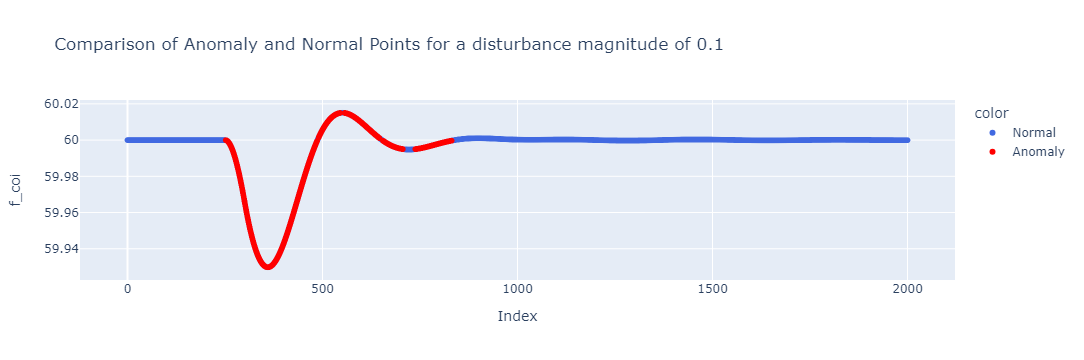

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



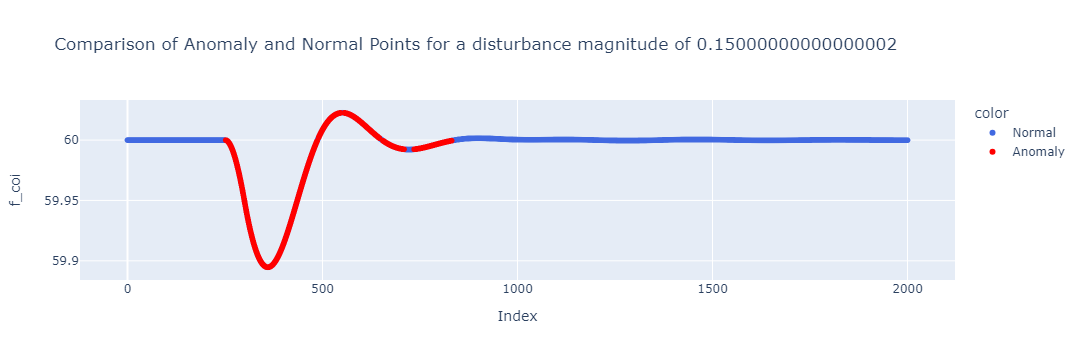

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



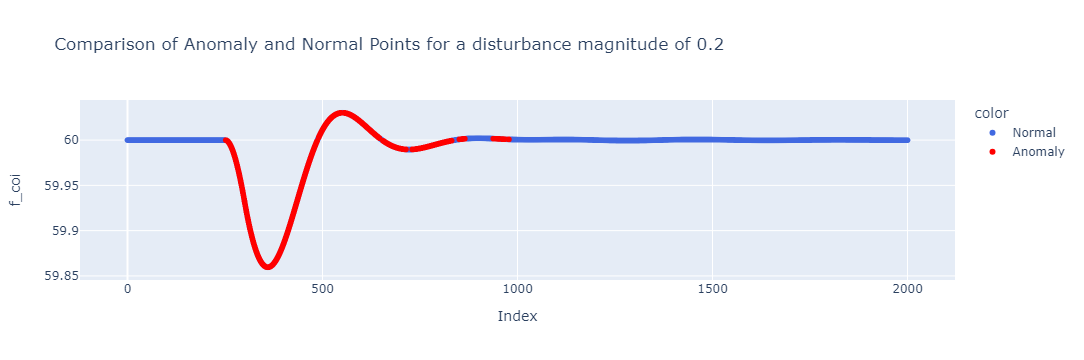

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



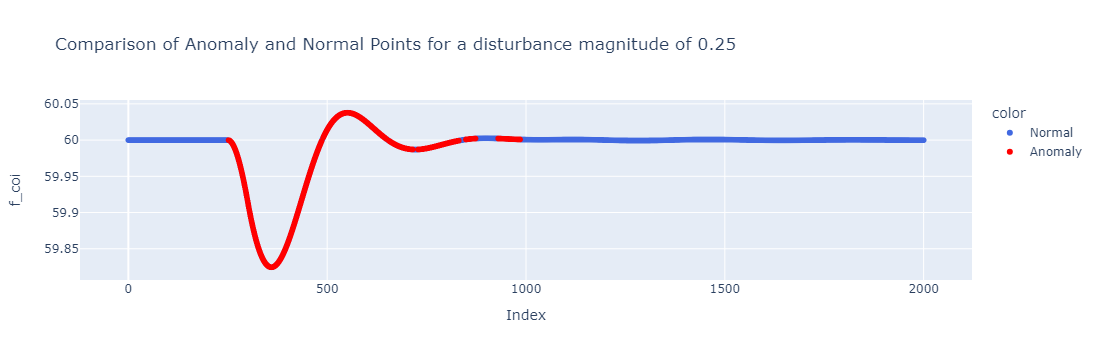

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



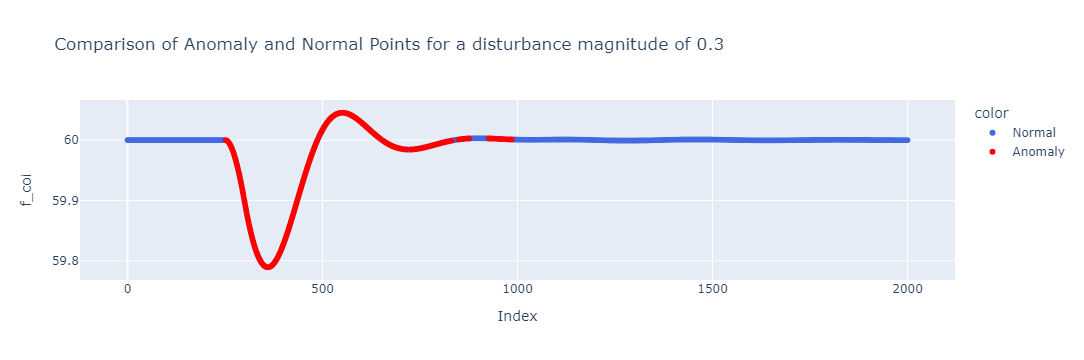

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



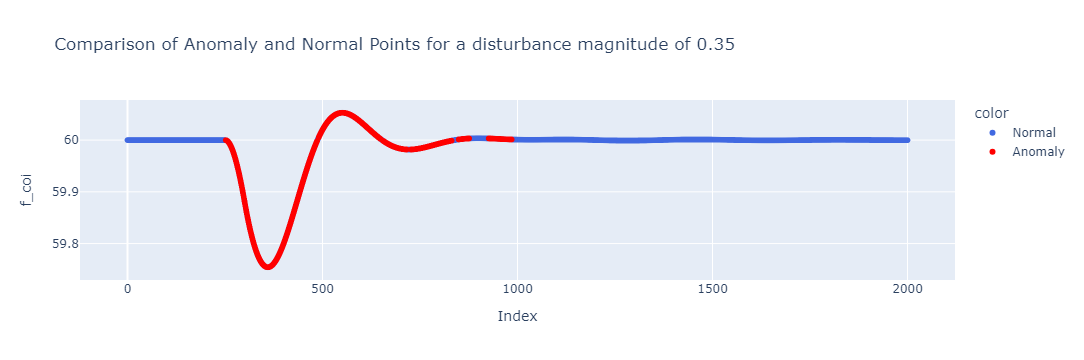

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



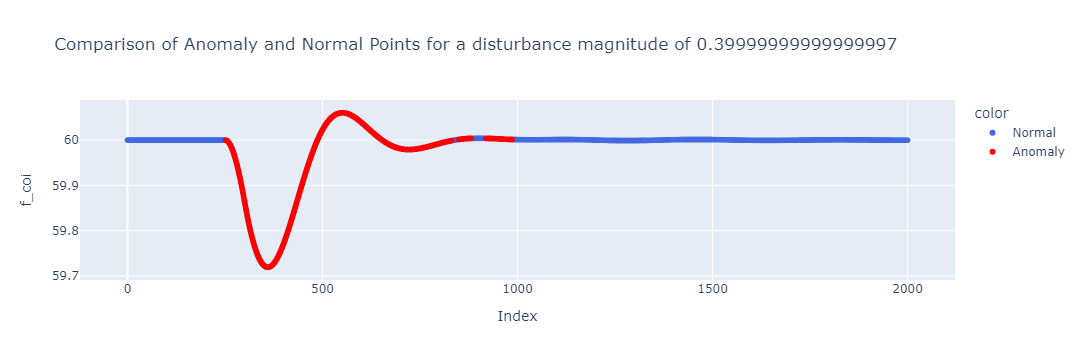

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



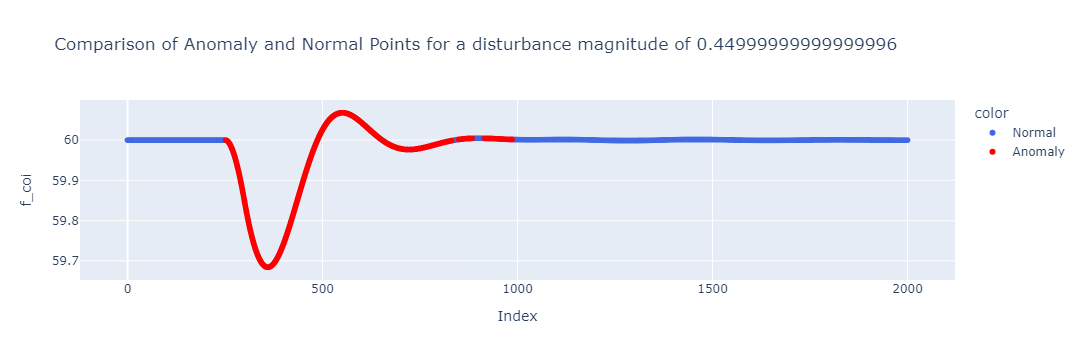

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



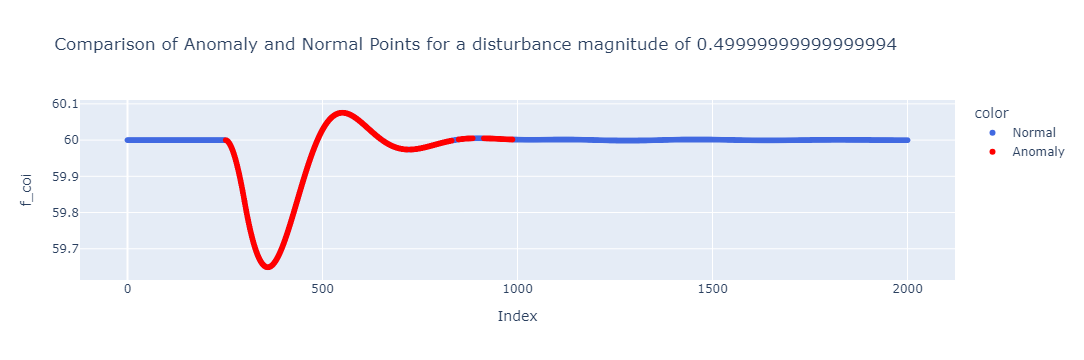

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



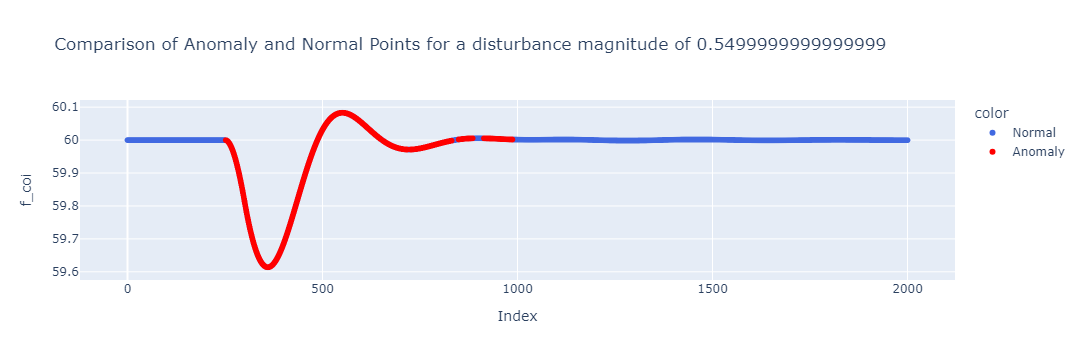

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



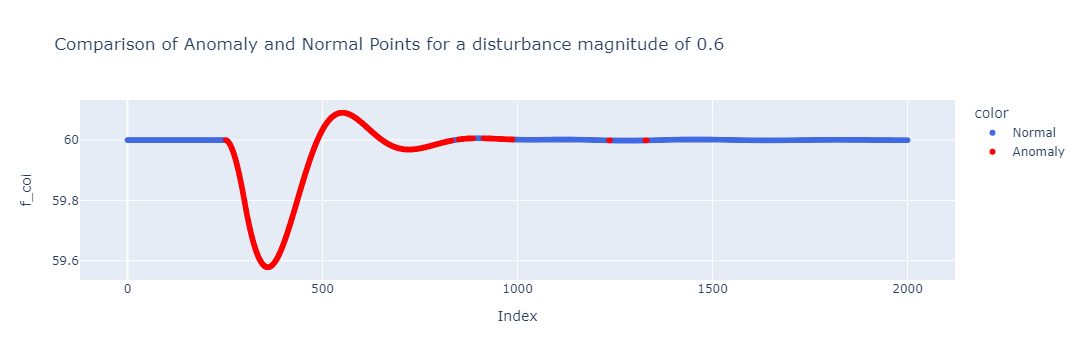

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



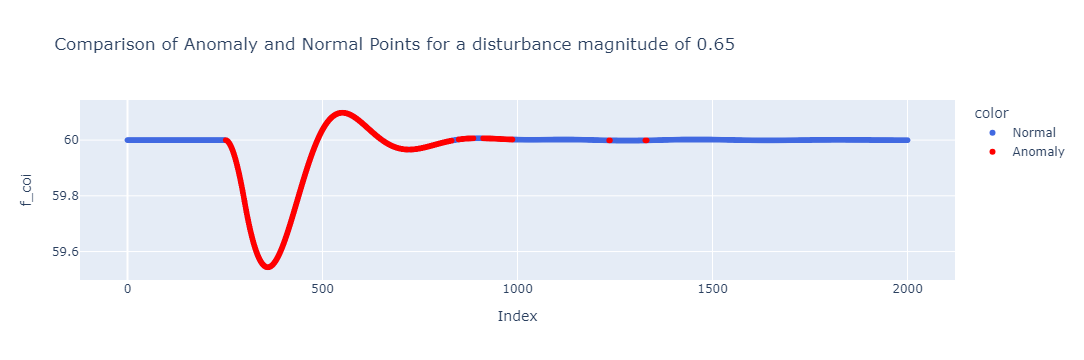

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



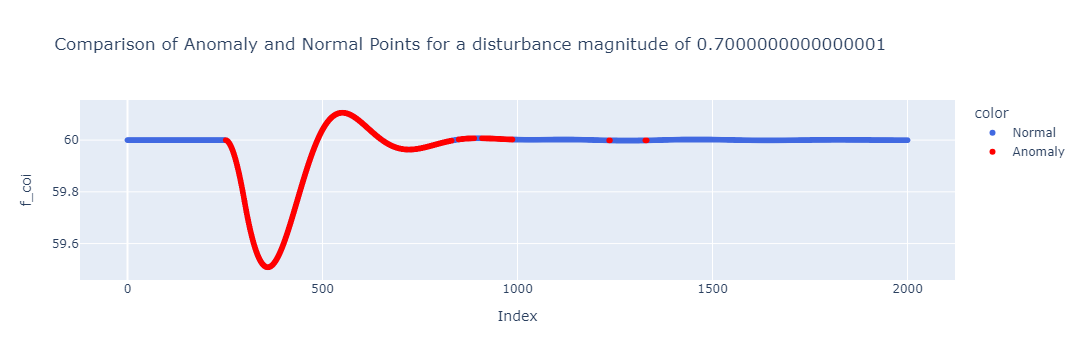

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



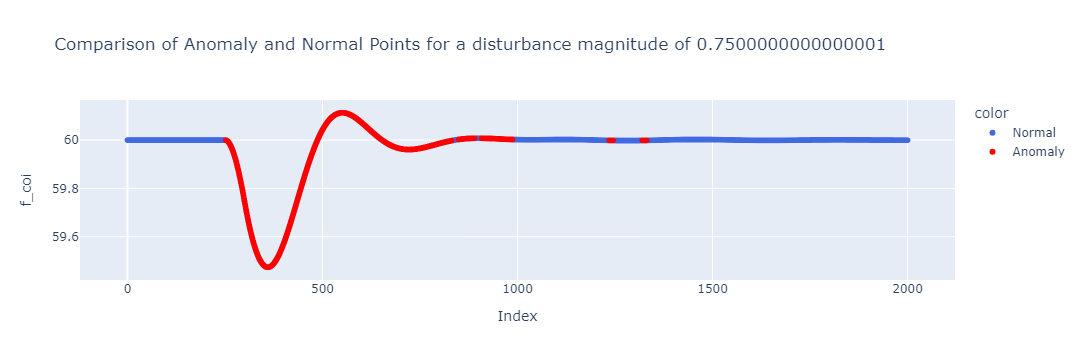

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



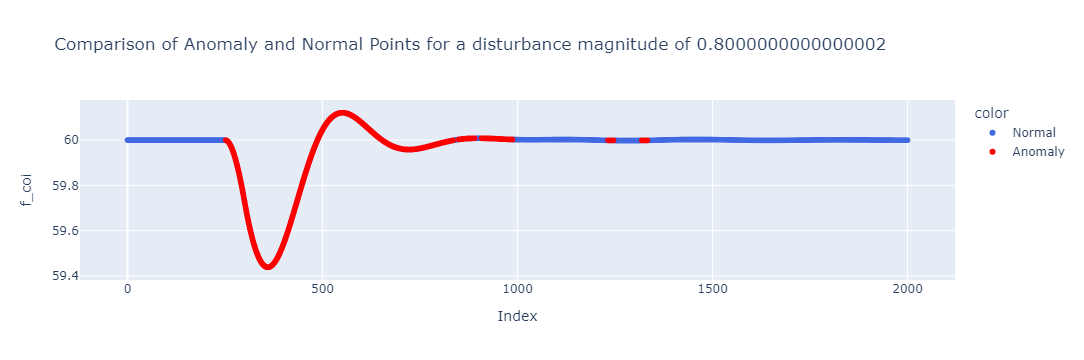

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



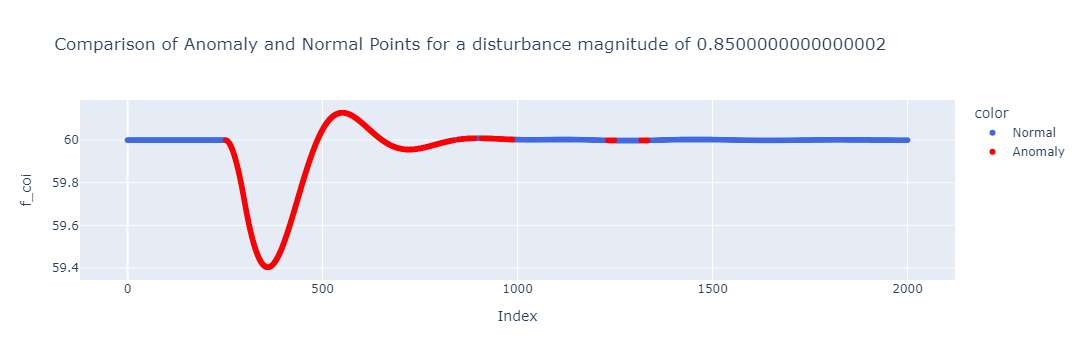

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



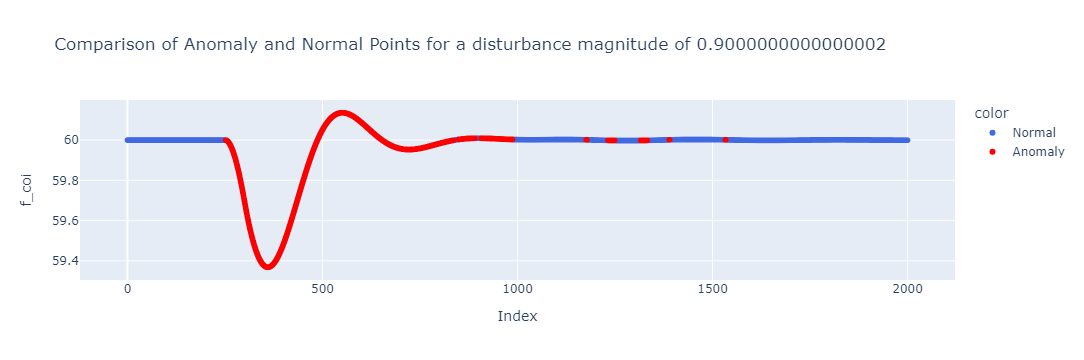

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



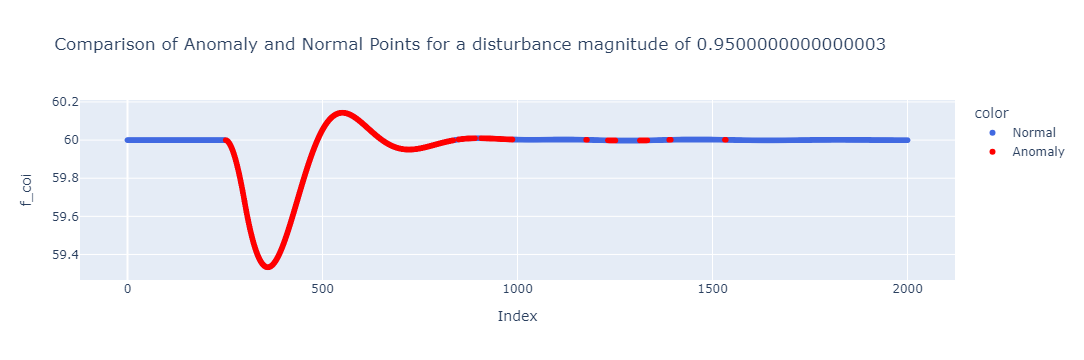

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_332\3987464959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



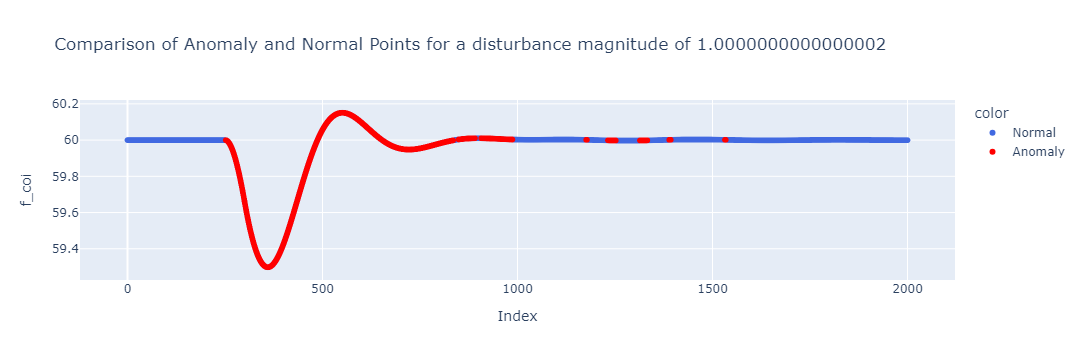

In [10]:
start, end=0, 2001
dis_mag=0.1
for i in range(0,19):
    signal=df_3d[i]
    signal_df=pd.DataFrame(signal)
    signal_anomaly_idx=[idx%2001 for idx in anomaly_indices if start < idx < end]
    start=end
    end+=2001
    anomaly_df = signal_df.iloc[signal_anomaly_idx]
    anomaly_df['color'] = 'Anomaly'
    
    normal_df = signal_df.copy()
    normal_df['color'] = 'Normal'
    
    # Concatenate normal points with anomaly points
    plot_df = pd.concat([normal_df, anomaly_df])
    
    # Create scatter plot with color mapping
    fig = px.scatter(plot_df, x=plot_df.index, y=2, color='color',
                 labels={'index': 'Index', '2': 'f_coi'},
                 color_discrete_map={'Normal': 'royalblue', 'Anomaly': 'red'},
                 title=f'Comparison of Anomaly and Normal Points for a disturbance magnitude of {dis_mag}')
    fig.show()
    
    dis_mag+=0.05

In [74]:
# first signal
a=df_3d[0]
result_df = pd.DataFrame(a)
result_df

0    1          2
0     0.1  0.0  59.999994
1     0.1  0.1  59.999961
2     0.1  0.1  59.999894
3     0.1  0.1  59.999795
4     0.1  0.1  59.999664
...   ...  ...        ...
1745  0.1  0.0  59.999955
1746  0.1  0.0  59.999955
1747  0.1  0.0  59.999955
1748  0.1  0.0  59.999955
1749  0.1  0.0  59.999955

[1750 rows x 3 columns]

In [75]:
anomaly_indices

array([   21,    22,    23, ..., 33233, 33234, 33239], dtype=int64)

In [76]:
start,end=0,1750
filter = [idx for idx in anomaly_indices if start < idx < end]
filter

[21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 228,
 235,
 236,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253

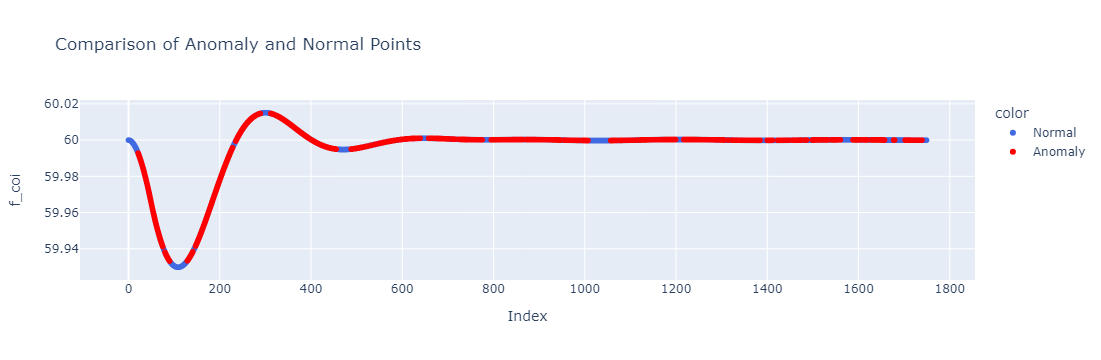

In [77]:
# Add markers for anomaly points
anomaly_df = result_df.loc[filter]
anomaly_df['color'] = 'Anomaly'

normal_df = result_df.copy()
normal_df['color'] = 'Normal'

# Concatenate normal points with anomaly points
plot_df = pd.concat([normal_df, anomaly_df])

# Create scatter plot with color mapping
fig = px.scatter(plot_df, x=plot_df.index, y=2, color='color',
                 labels={'index': 'Index', '2': 'f_coi'},
                 color_discrete_map={'Normal': 'royalblue', 'Anomaly': 'red'},
                 title='Comparison of Anomaly and Normal Points')
fig.show()